# Lecture 5: Decision Tree

<br>[1] scikit-learn decision tree classifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
<br> [2] Plotting a tree diagram https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
<br>[3] Plotting confusion matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
<br>[4] Data Source: https://archive.ics.uci.edu/ml/datasets/heart+disease

**age:** age in years
<br>**sex:** sex (1 = male; 0 = female)
<br>**cp:** chest pain type
- Value 1 = typical angina
- Value 2 = atypical angina
- Value 3 = non-anginal pain
- Value 4 = asymptomatic


<br>**trestbps:** resting blood pressure (in mm Hg on admission to the hospital)
<br>**chol:** serum cholestoral in mg/dl
<br>**fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
<br>**restecg:** resting electrocardiographic results
- 0 = normal
- 1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

<br>**MaxHR:** maximum heart rate achieved
<br>**exang:** exercise induced angina (1 = yes; 0 = no)
<br>**oldpeak:** ST depression induced by exercise relative to rest
<br>**slope:** the slope of the peak exercise ST segment
- 1 = upsloping
- 2 = flat
- 3 = downsloping

<br>**ca:** number of major vessels (0-3) colored by flourosopy
<br>**thal:** 
- 3 = normal; 
- 6 = fixed defect; 
- 7 = reversable defect

<br>**AHD:** diagnosis of heart disease (angiographic disease status)
- Value 0: < 50% diameter narrowing
- Value 1: > 50% diameter narrowing

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

#### Loading heart disease data

In [2]:
# df = pd.read_csv("Heart.csv")

df = pd.read_csv("Heart.csv", index_col = 0)

# df = df.dropna()

print(df.columns)

# display(df.head(10))
print(df.info())
# df.shape

Index(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 52 to 54
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       1025 non-null   int64  
 1   cp        1025 non-null   int64  
 2   trestbps  1025 non-null   int64  
 3   chol      1025 non-null   int64  
 4   fbs       1025 non-null   int64  
 5   restecg   1025 non-null   int64  
 6   thalach   1025 non-null   int64  
 7   exang     1025 non-null   int64  
 8   oldpeak   1025 non-null   float64
 9   slope     1025 non-null   int64  
 10  ca        1025 non-null   int64  
 11  thal      1025 non-null   int64  
 12  target    1025 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 112.1 KB
None


In [3]:
df.isna().sum()
# df.shape

sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Checking categorical variables

In [7]:
df["thal"].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [8]:
df["ca"].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

In [12]:
# df["chestpain"].value_counts()

In [13]:
# df["Slope"].value_counts()

In [14]:
df["restecg"].value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

In [21]:
c_vars = ["restecg", "slope", "cp", "ca", "thal"]

#### Target variable: 'hd'

In [22]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

#### Create feature set and target

In [23]:
X = df.drop("target", axis=1)
y = df[["target"]]

print(X.shape, y.shape)
print(X.columns)

(1025, 12) (1025, 1)
Index(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


#### One-hot encoding and Label Encoding

In [24]:
X = pd.get_dummies(X, columns=c_vars, drop_first=True)

print(X.shape)

(1025, 21)


In [25]:
X.columns

Index(['sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
       'restecg_1', 'restecg_2', 'slope_1', 'slope_2', 'cp_1', 'cp_2', 'cp_3',
       'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

In [26]:
X.head(4)

,sex,trestbps,chol,fbs,thalach,exang,oldpeak,restecg_1,restecg_2,slope_1,...,cp_1,cp_2,cp_3,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
age,,,,,,,,,,,,,,,,,,,,,
52,1,125,212,0,168,0,1.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
53,1,140,203,1,155,1,3.1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
70,1,145,174,0,125,1,2.6,1,0,0,...,0,0,0,0,0,0,0,0,0,1
61,1,148,203,0,161,0,0.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [27]:
y.value_counts()

target
1         526
0         499
dtype: int64

In [28]:
# Label Encoding
y = y.replace({"No": 0, "Yes": 1})

#### Split the dataset intro train and test set

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=13, 
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(820, 21) (205, 21) (820, 1) (205, 1)


#### Decision Tree classifier

In [30]:
DT = DecisionTreeClassifier()
# LR = LogisticRegression()
DT = DT.fit(X_train, y_train)

#### Tree Diagram

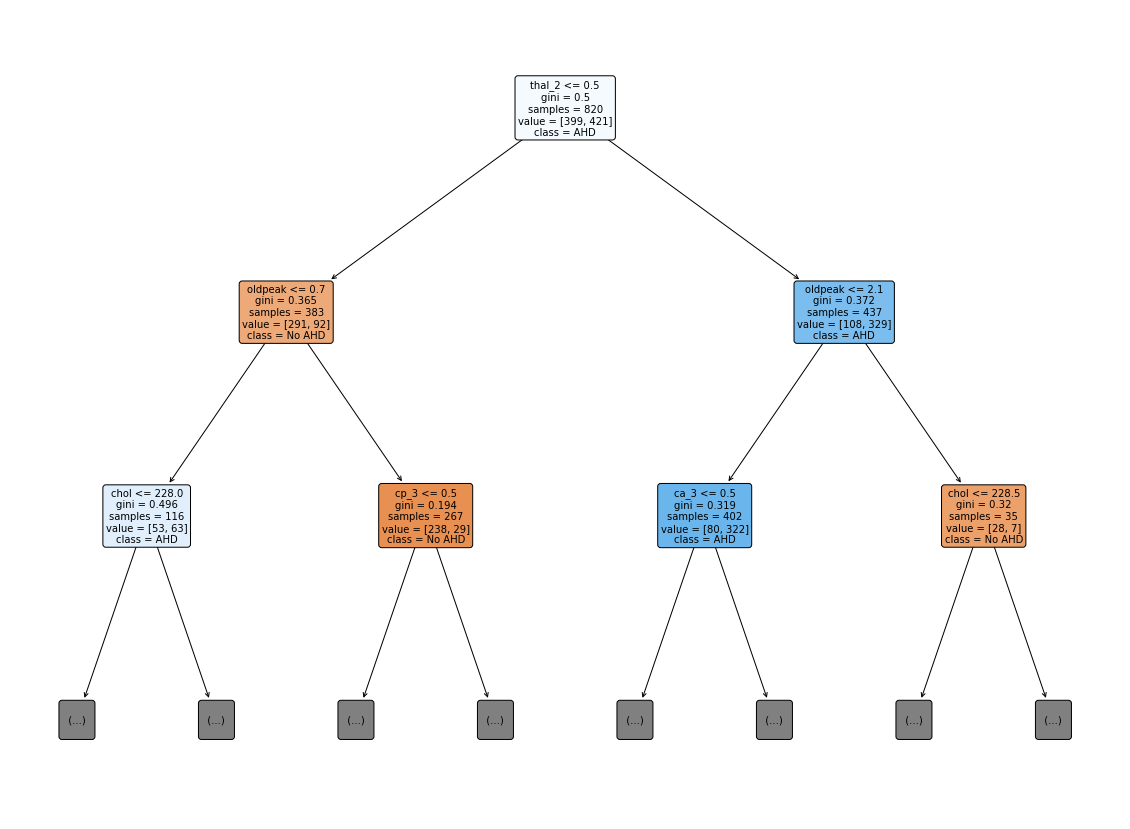

In [31]:
plt.figure(figsize = (20, 15))
plot_tree(DT, filled=True, rounded=True, class_names = ["No AHD", "AHD"], feature_names = X.columns, max_depth=2, fontsize=10)
plt.show()

#### Model Performance Evaluation

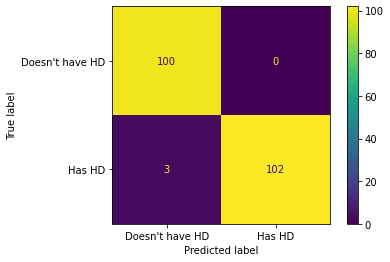

In [32]:
plot_confusion_matrix(DT,X_test, y_test, display_labels=["Doesn't have HD", "Has HD"])
plt.show()

In [33]:
y_pred = DT.predict(X_test)

In [34]:
# y_pred
# DT.predict_proba(X_test)

In [35]:
accuracy_score(y_test,y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



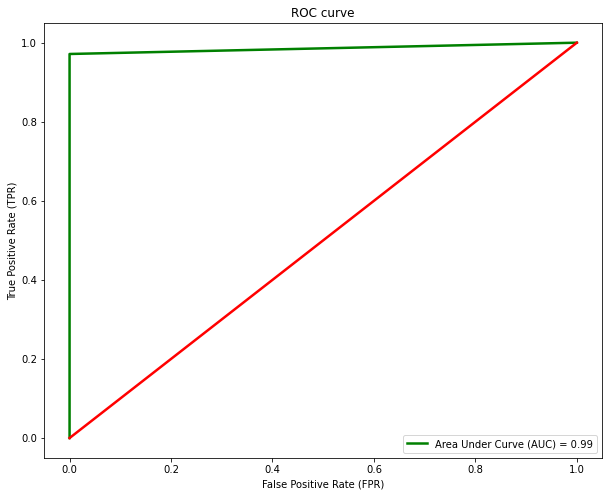

In [36]:
fpr, tpr, thr = roc_curve(y_test, DT.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2.5, label="Area Under Curve (AUC) = %0.2f" % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2.5, linestyle='-')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [37]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7, None],
              'max_features': ["auto"]}

model = DecisionTreeClassifier(random_state=13)
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="precision",
                           cv=5,
                           n_jobs=-1)

# grid_search = GridSearchCV(estimator=model,
#                            param_grid=parameters,
#                            scoring="accuracy",
#                            cv=5,
#                            n_jobs=-1)

# grid_search = GridSearchCV(estimator=model,
#                            param_grid=parameters,
#                            scoring="precision",
#                            cv=5,
#                            n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)

In [38]:
grid_result

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=13), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, None],
                         'max_features': ['auto']},
             scoring='precision')

#### hyperparameters for grid search in each iteration
- iteration 1: criterion='gini', max_depth=3
- iteration 2: criterion='gini', max_depth=4
- iteration 3: criterion='gini', max_depth=5
- iteration 4: criterion='gini', max_depth=6
- iteration 5: criterion='gini', max_depth=7
- iteration 6: criterion='entropy', max_depth=3
- iteration 7: criterion='entropy', max_depth=4
- iteration 8: criterion='entropy', max_depth=5
- iteration 9: criterion='entropy', max_depth=6
- iteration 10: criterion='entropy', max_depth=7

In [39]:
y_pred = grid_result.predict(X_test)

#### Best hyperparameters in the grid search

In [40]:
grid_result.best_params_

{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto'}

In [41]:
grid_result.cv_results_

{'mean_fit_time': array([0.00797758, 0.00738711, 0.00917535, 0.00917096, 0.00758152,
        0.00737677, 0.00837812, 0.00678124, 0.00877652, 0.00718169,
        0.0073802 , 0.00638223]),
 'std_fit_time': array([0.00126294, 0.00241484, 0.00364603, 0.00336719, 0.00149132,
        0.00248693, 0.00286303, 0.00171619, 0.00291783, 0.00193393,
        0.00173894, 0.00048901]),
 'mean_score_time': array([0.00518603, 0.00517879, 0.00518637, 0.00418735, 0.00578184,
        0.00678239, 0.00458798, 0.00398865, 0.00418901, 0.00418811,
        0.00299182, 0.00319176]),
 'std_score_time': array([1.16222206e-03, 7.51643687e-04, 3.42050823e-03, 1.16434174e-03,
        3.24224706e-03, 3.17884038e-03, 1.62067005e-03, 1.09183999e-03,
        1.46565503e-03, 1.16269620e-03, 7.92181383e-07, 7.46977583e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'entropy', 'entropy', 'entropy', 'entropy', 'entropy',
                    'entropy'],
        

In [42]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
# print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,gini,None,1.000000,0.943182,1.000000,1.000000,0.976744,0.983985,0.022301,1
11,entropy,None,1.000000,1.000000,0.965517,0.975904,0.977011,0.983686,0.013911,2
10,entropy,7,0.894118,0.875000,0.858974,0.878049,0.840426,0.869313,0.018250,3
4,gini,7,0.869565,0.783505,0.878378,0.878049,0.902439,0.862387,0.040937,4
3,gini,6,0.860465,0.900000,0.827160,0.826087,0.878049,0.858352,0.028778,5
2,gini,5,0.814433,0.813953,0.863014,0.886076,0.868421,0.849179,0.029567,6
9,entropy,6,0.808511,0.827586,0.828947,0.883117,0.863636,0.842359,0.027047,7
8,entropy,5,0.839080,0.782609,0.863014,0.802326,0.850000,0.827406,0.030168,8
6,entropy,3,0.802469,0.761905,0.750000,0.790123,0.851852,0.791270,0.035672,9
0,gini,3,0.779070,0.779412,0.750000,0.790123,0.851852,0.790091,0.033637,10


#### Model performance evaluation with the best found model in grid search and cross-validation

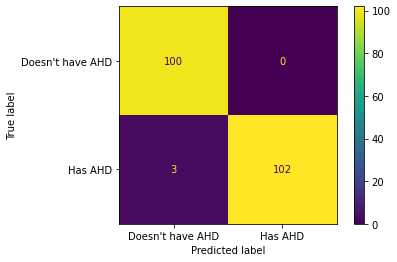

In [43]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test, 
                      display_labels=["Doesn't have AHD", "Has AHD"])
plt.show()

In [44]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred)
print('confusion_matrix: \n', confusion_matrix_dt)

print('Accuracy: ', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

confusion_matrix: 
 [[100   0]
 [  3 102]]
Accuracy:  0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



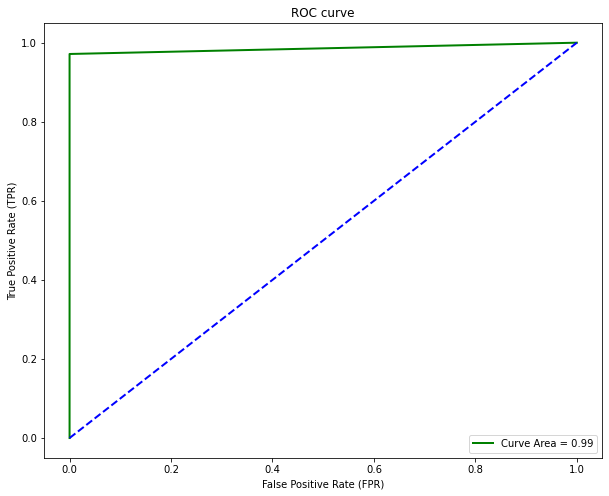

In [45]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()